For this assignment, we will follow these steps:

    1) Data import

    2) Data Exploration:
   
       a) Plot a couple of random features against the target/features
   
       b) Perform summary statistics
   
    3) Data Wrangling: Check for messy data and take appropriate action. eg: replace NaN with meaningful values. 

    4) Feature Selection: This step is optional but useful when dealing with large dimensional data.

    5) Model building and validation: Create a training set and test set. Start from simpler models and gradually move towards more complex models. 

    6) Test: Run the models (from (4)) against the test set (% training) and choose the best performing model. Finally test your best model against the data provided by XXX and submit the results

# Part 1: Data Import

In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [53]:
rawTrain= pd.read_csv('codetest_train.txt',sep='\t')
rawTest = pd.read_csv('codetest_test.txt',sep='\t')
columnNames = rawTrain.columns

# Part 2: Data Exploration 

In [3]:
rawTrain.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.652557,0.255256,-0.615412,-1.833283,-0.735654,NaN,1.115108,-0.170707,-0.350879,...,-1.607174,-1.400451,-0.920319,-0.198487,-0.944919,-0.572555,0.170449,-0.417764,-1.244350,-0.502889
1,-1.910473,1.178667,-0.093398,-0.555568,0.811153,-0.467931,-0.005488,-0.116258,-1.242854,1.984955,...,1.281957,0.032356,-0.060830,NaN,-0.061294,-0.301641,1.280799,-0.849742,0.821387,-0.259742
2,7.830711,0.180984,-0.778108,-0.919190,0.112607,0.887144,-0.761681,1.872443,-1.708934,0.134782,...,-0.236893,-0.659965,1.072506,-0.192872,0.570371,-0.267201,1.434515,1.331823,-1.146947,2.579905
3,-2.180862,0.745228,-0.245268,-1.343348,1.163072,-0.168847,-0.150516,-1.099532,0.225346,1.223015,...,0.709195,-0.203496,-0.135737,-0.570835,1.682078,0.243042,-0.380941,0.612880,1.032715,0.400305
4,5.462784,1.217383,-1.323946,-0.958151,0.448290,-2.873187,-0.855653,0.602568,0.763372,0.019770,...,0.892303,-0.432659,-0.877101,0.289258,0.653759,1.230144,0.456956,-0.754051,-0.025100,-0.931225


In [3]:
rawTest.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122161,2.372084,-1.302713,-0.420838,-1.723640,0.205672,0.448599,1.305198,-0.343860,0.307042,...,0.987785,-0.472495,0.521588,-0.307917,1.061505,-0.839408,0.818555,0.341522,-0.162471,-1.122791
1,0.644808,-0.817831,-1.193122,0.285867,0.946388,2.001413,-1.490880,-0.162357,-1.668155,0.309635,...,-0.019666,0.763533,-0.622877,0.147480,0.391625,0.509444,1.608021,-0.320951,-1.723378,1.222700
2,-0.661031,0.372804,1.160255,0.447586,NaN,-0.377757,-0.644618,0.713097,1.900375,0.627264,...,0.156354,-0.267040,0.139786,-0.907847,0.093219,0.226585,-0.995615,-0.665005,0.444115,-1.452071
3,0.837063,1.269625,-1.420543,-0.482877,1.136028,0.051415,-0.096677,NaN,-1.524041,-0.252841,...,1.653141,1.950726,0.656887,-1.237622,-0.487024,-1.340936,1.221345,1.938266,-0.447294,0.410684
4,-0.001493,-0.050440,0.441970,0.229519,0.524835,0.326089,-0.589504,-0.287145,-0.555982,-0.088494,...,-0.290987,-0.195876,-0.737650,-0.377331,-0.660202,1.775678,-1.027535,-0.796754,0.184635,0.378488


In [5]:
rawTrain.shape

(5000, 255)

In [6]:
rawTrain.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000432,0.002564,0.028875,-0.005436,-0.006764,0.005568,0.001536,-0.001016,0.009748,...,0.013529,0.004937,0.023262,-0.018450,-0.009832,0.016954,-0.004944,0.016878,-0.001356,0.010331
std,5.259896,0.999737,0.997931,1.019343,0.990349,1.006289,0.995800,1.004624,0.997360,0.988310,...,1.001454,0.997329,0.996465,1.005001,0.989225,1.011337,0.991580,1.001362,1.003412,1.006887
min,-26.705570,-3.940976,-3.847382,-3.818473,-3.434423,-3.400202,-4.051005,-3.179496,-3.889719,-3.856546,...,-3.585086,-3.493958,-3.484578,-4.012033,-3.252239,-3.821459,-3.376073,-3.373395,-3.949648,-3.727771
25%,-2.034383,-0.673040,-0.684705,-0.650854,-0.654998,-0.685200,-0.659947,-0.671828,-0.679356,-0.662404,...,-0.666017,-0.676178,-0.661783,-0.692160,-0.662535,-0.647772,-0.679635,-0.647463,-0.695102,-0.676679
50%,1.166835,-0.010543,-0.002652,0.047116,0.003579,-0.007036,-0.007822,-0.003055,-0.021591,0.016544,...,0.025606,-0.027898,0.026912,-0.034966,-0.010708,0.002441,0.009770,0.019531,0.002471,0.015306
75%,4.439549,0.677278,0.674600,0.718753,0.667814,0.653662,0.648748,0.678594,0.670028,0.698020,...,0.671749,0.670035,0.702553,0.655212,0.650979,0.709693,0.660469,0.692202,0.672384,0.705512
max,26.347818,3.830801,3.995597,3.198775,4.962191,3.106121,4.295765,4.165960,3.798185,4.195049,...,3.365021,3.455789,3.881038,3.689781,3.629413,4.144275,3.873226,3.186501,3.724332,3.955565


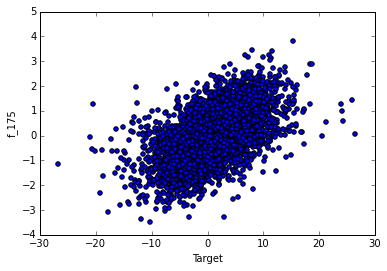

In [85]:
# Plot a random chosen feature against the target to get an idea of what the data looks like
plt.scatter(rawTrain.target,rawTrain.f_175)
plt.xlabel('Target')
plt.ylabel('f_175')
plt.show()

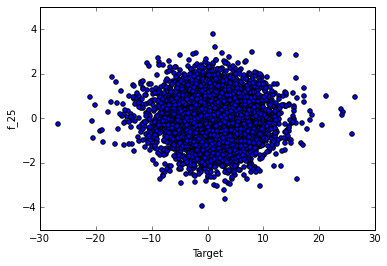

In [86]:
plt.scatter(rawTrain.target,rawTrain.f_25)
plt.xlabel('Target')
plt.ylabel('f_25')
plt.show()

# Part 3: Data Wrangling

In [91]:
# rawTrain.describe() in the 'feature space' is returning < 5000 data points. This most likely indicates
# missing values in the form of NaNs plus other types
# Lets identify and impute those missing values
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values = 'NaN',axis=1,strategy='median')
impute.fit(rawTrain)
newData = pd.DataFrame(impute.transform(rawTrain))

In [55]:
# The above error tells us know that there are strings other than 'NaN'. So convert any string present 
# in the data frame such as 'Mexico' to 'NaN'
rawTrain.replace(to_replace='[^0-9]',value=np.nan,regex=True,inplace=True)

In [56]:
# Attempt again to Impute missing values after replacing any missing values to 'NaN'
impute.fit(rawTrain)
newData = pd.DataFrame(impute.transform(rawTrain))
newData.columns = columnNames
print newData.describe()

            target          f_0          f_1          f_2          f_3  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      1.143878    -0.000355     0.002206     0.028623    -0.005205   
std       5.259896     0.990047     0.990770     1.009985     0.981446   
min     -26.705570    -3.940976    -3.847382    -3.818473    -3.434423   
25%      -2.034383    -0.660225    -0.673327    -0.633348    -0.639670   
50%       1.166835    -0.006441    -0.006354     0.042915     0.003077   
75%       4.439549     0.662480     0.664463     0.702068     0.654018   
max      26.347818     3.830801     3.995597     3.198775     4.962191   

               f_4          f_5          f_6          f_7          f_8  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.006740     0.005295     0.001422    -0.001200     0.009509   
std       0.996951     0.987064     0.994278     0.987814     0.977753   
min      -3.400202    -4.051005    -3

In [57]:
print rawTrain.describe()

            target          f_0          f_1          f_2          f_3  \
count  5000.000000  4903.000000  4928.000000  4908.000000  4910.000000   
mean      1.143878    -0.000432     0.002564     0.028875    -0.005436   
std       5.259896     0.999737     0.997931     1.019343     0.990349   
min     -26.705570    -3.940976    -3.847382    -3.818473    -3.434423   
25%      -2.034383    -0.673040    -0.684705    -0.650854    -0.654998   
50%       1.166835    -0.010543    -0.002652     0.047116     0.003579   
75%       4.439549     0.677278     0.674600     0.718753     0.667814   
max      26.347818     3.830801     3.995597     3.198775     4.962191   

               f_4          f_5          f_6          f_7          f_8  \
count  4907.000000  4912.000000  4897.000000  4904.000000  4893.000000   
mean     -0.006764     0.005568     0.001536    -0.001016     0.009748   
std       1.006289     0.995800     1.004624     0.997360     0.988310   
min      -3.400202    -4.051005    -3

Now the 'count' for every feature is returning 5000 samples - which means we have been able to 
successfully replace all missing values in a given column with the median for that column. Other changes that are noticebale is because we  have replaced NaN in each feature with a corresponding 'median', the summary statistics has also changed (but hopefully not large enough to lead to incorrect downward analysis)

In [58]:
rawTrain = newData

In [59]:
# delet variables from memory
%reset_selective newData
#%reset_selective trainFeatures
#%reset_selective trainTarget

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [60]:
# divide raw_data into train and validation set (90% training set, 10% test set)
from sklearn.cross_validation import train_test_split

trainValidation,test = train_test_split(rawTrain,train_size=0.9,random_state=1024)
print trainValidation.shape,test.shape

(4500, 255) (500, 255)


In [62]:
# Separate into targets and features
trainTarget = trainValidation.target
trainFeatures = trainValidation[columnNames[1:]]
print trainTarget.shape,trainFeatures.shape

(4500L,) (4500, 254)


# Part 4: Feature Selection 

In [63]:
# Since there are too many features (254) we can reduce the dimensionality using univariate analysis 
# for feature selection using SelectPercentile that selects top 10% of features 

from sklearn.feature_selection import SelectPercentile,f_regression
selectFeat = SelectPercentile(f_regression,percentile=10)
selectFeat.fit(trainFeatures,trainTarget)
trainTrans = selectFeat.transform(trainFeatures)
print "Original dimensions: (%i,%i)" % trainFeatures.shape
print "Reduced dimensions: (%i,%i)" % trainTrans.shape

Original dimensions: (4500,254)
Reduced dimensions: (4500,26)


# Part 5: Model building and validation

In [64]:
# Building a custom cross validation function with K=10 folds (default)
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_squared_error

def crossValidationfn(model,X,y,k=10):
    cvMean = cross_val_score(model,X,y,scoring='mean_squared_error',cv=k).mean()
    print "Cross validation score: %f" % abs(cvMean)
    predicted = cross_val_predict(model,X,y,cv=2)
    plt.scatter(y,predicted)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(str(model))
    plt.show()


### Model 1: Simple Linear Regression Model

Cross validation score: 13.853366


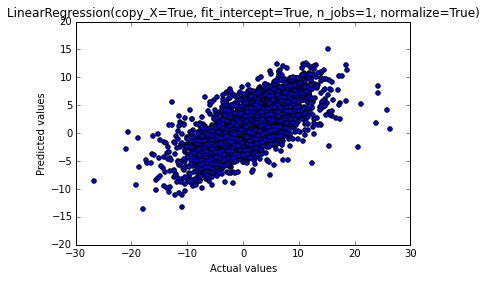

In [65]:
# Lets build a simple linear model from the data with reduced number of features
from sklearn.linear_model import LinearRegression

LinModel = LinearRegression(normalize=True)
crossValidationfn(LinModel,trainTrans,trainTarget)

### Model 2: Lasso Model

Cross validation score: 27.921252


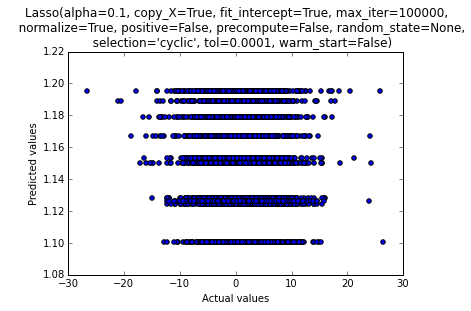

In [42]:
# Using all features: letting the model vary the complexity via alpha
from sklearn.linear_model import Lasso
lassoModel = Lasso(alpha=0.1,normalize=True,fit_intercept=True,max_iter=100000,tol=0.0001)
crossValidationfn(lassoModel,trainFeatures,trainTarget)

Lasso performs poorly and similar results were obtained for # Elastic Net model(not shown)


### Model 3: SVM

Cross validation score: 7.219325


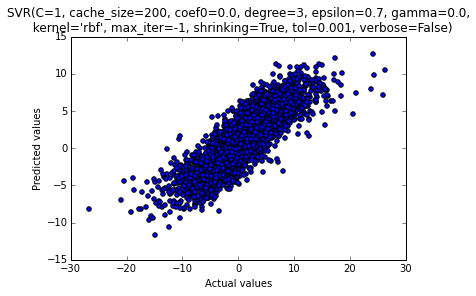

In [66]:
from sklearn.svm import SVR
svrModel = SVR(C=1,epsilon=0.7,kernel='rbf')
crossValidationfn(svrModel,trainTrans,trainTarget)


The SVM non linear regression model looks promising and will be evalauted further for 
the most appropriate 'C' and 'epsilon' values using [randomized search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html#example-model-selection-randomized-search-py).


In [67]:
# Utility function to report best scores i.e. sorted with lowest std amongst the cv_validation_score 
# obtained on each iter
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
    return top_scores[0].parameters

In [68]:
# Implement the search for returning 'C' and 'epsilon' values that might beat the validation score
# obtained from the previous SVR model where C = 1, epsilon = 0.7
from sklearn.svm import SVR
from sklearn.grid_search import RandomizedSearchCV
num_iters = 20
param_dist = {'C': scipy.stats.expon(scale=100), 'epsilon': scipy.stats.expon(scale=.1)}
svrModel = SVR(kernel='rbf')
randomSearch = RandomizedSearchCV(svrModel,param_distributions=param_dist,n_iter=num_iters,n_jobs=1)
randomSearch.fit(trainTrans,trainTarget)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000003919240>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001BD64E10>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [69]:
from operator import itemgetter
highScore = report(randomSearch.grid_scores_)

Model with rank: 1
Mean validation score: 0.778 (std: 0.012)
Parameters: {'epsilon': 0.13115370672565332, 'C': 4.116851492086862}

Model with rank: 2
Mean validation score: 0.771 (std: 0.012)
Parameters: {'epsilon': 0.182533074256634, 'C': 2.7282077037845354}

Model with rank: 3
Mean validation score: 0.768 (std: 0.012)
Parameters: {'epsilon': 0.621951466363347, 'C': 2.4681927960234913}



Cross validation score: 5.934327


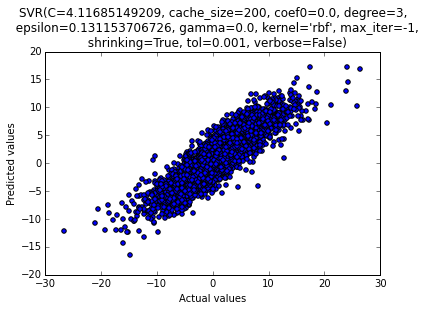

In [70]:
# Now use the new values of the params C, epsilon to build a new SVR model
svrModel = SVR(C=highScore['C'],epsilon=highScore['epsilon'],kernel='rbf')
crossValidationfn(svrModel,trainTrans,trainTarget)

Until now the best estimator model using validation data is the SVM model. But before we can narrow
down our final choice let us evaluate a random forest regresson model - these models in my experience
have consistently outperformed other models.

### Model 4: Random Forest Regressor

Cross validation score: 11.376322


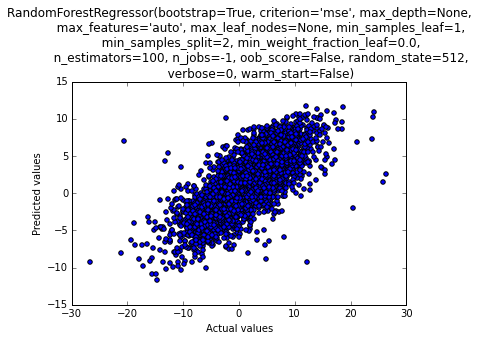

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=512,warm_start=False)
crossValidationfn(rfModel,trainTrans,trainTarget)

In this case, the random forest estimator did not outperform our best model yet - SVR model.
However before we select the final model to run against XXX's test data, let us run the models we have obtained so far - 3 in total (ignoring Lasso)- against our own test data, which was split from the training data.

# Part 6:Testing

In [88]:
# Let us first test each of the above models against our test data (split from the training data)
def selectModel(models,X,y,testData):
    bestModel = ''
    lowestMSE = 1000 # a relatively large value
    testActual = testData.target
    testFeatures = testData[columnNames[1:]]
    #choose the same top 10% of best features
    testFeatures = selectFeat.transform(testFeatures) 
    for model in models:
        model.fit(X,y)
        testPredicted = model.predict(testFeatures)
        mse = mean_squared_error(testActual,testPredicted)
        if mse < lowestMSE:
            lowestMSE = mse
            bestModel = model
    print "The best performing model with the lowest MSE of %f" %(lowestMSE) + " is %s" % (str(bestModel))
    return bestModel

In [89]:
models = [LinModel,svrModel,rfModel]
chosenModel = selectModel(models,trainTrans,trainTarget,test)

The best performing model with the lowest MSE of 5.527550 is SVR(C=4.11685149209, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.131153706726, gamma=0.0, kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)


Testing against our test data validates our assumption obtained from the cross validation set that the SVR model performs the best. Let us now choose this SVR model to predict the values from the test data supplied by XXX

In [95]:
# Repeat the data wrangling and feature selection step for the rawTest data
rawTest = pd.read_csv('codetest_test.txt',sep='\t')
rawTest.replace(to_replace='[^0-9]',value=np.nan,regex=True,inplace=True)
newTest = pd.DataFrame(impute.transform(rawTest))
newTest.columns = columnNames[1:]

In [96]:
newTest.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.034028,0.098586,0.020877,0.004962,-0.040922,-0.013846,-0.033229,0.025923,0.028147,0.000582,...,0.022395,-0.069304,0.037510,0.052687,-0.021898,-0.027547,-0.025014,0.003957,-0.006724,-0.016327
std,0.964309,0.981238,1.019753,0.980384,1.004854,1.030493,1.008972,0.961176,0.953091,0.989204,...,0.960690,0.997949,0.974454,1.015472,1.021621,0.932607,1.035986,0.990182,0.987646,1.008032
min,-2.997471,-2.760324,-3.516908,-3.017461,-3.332268,-3.241418,-3.441028,-2.827583,-2.911107,-4.457038,...,-2.801388,-4.185742,-3.155603,-4.144691,-3.400451,-2.860234,-3.363570,-2.958576,-2.985039,-3.490942
25%,-0.668085,-0.570358,-0.639248,-0.659531,-0.697666,-0.720423,-0.737136,-0.657320,-0.558398,-0.698824,...,-0.574862,-0.741272,-0.598735,-0.677855,-0.749769,-0.635579,-0.696704,-0.663989,-0.662829,-0.696748
50%,-0.031035,0.131058,0.029997,0.010583,-0.022447,-0.024403,-0.061822,0.018386,0.003082,-0.025854,...,0.014648,-0.073679,0.044344,0.035706,-0.021504,-0.026519,-0.039279,0.031942,0.008377,-0.002547
75%,0.654211,0.695089,0.686617,0.648816,0.573426,0.715987,0.642729,0.652685,0.685727,0.672873,...,0.628249,0.570443,0.683160,0.712811,0.640583,0.570567,0.698727,0.636486,0.658426,0.642925
max,3.021523,3.188313,3.122314,2.927159,3.461580,2.872705,3.729902,3.175809,2.863248,3.023337,...,3.041313,3.496382,3.019044,3.971462,3.046540,3.351166,3.335669,3.083248,2.727019,3.412559


In [97]:
rawTest.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,972.000000,983.000000,983.000000,982.000000,978.000000,984.000000,982.000000,978.000000,980.000000,979.000000,...,973.000000,976.000000,985.000000,979.000000,986.000000,980.000000,981.000000,978.000000,979.000000,985.000000
mean,-0.035218,0.100808,0.021092,0.005410,-0.042313,-0.013645,-0.033507,0.025955,0.029105,0.000240,...,0.022774,-0.071013,0.038256,0.053578,-0.021731,-0.028499,-0.025653,0.003534,-0.007103,-0.017023
std,0.978022,0.989476,1.028485,0.989308,1.016012,1.038796,1.018108,0.971877,0.962722,0.999692,...,0.973856,1.010045,0.981793,1.026267,1.028843,0.941971,1.045910,1.001208,0.998147,1.015622
min,-2.997471,-2.760324,-3.516908,-3.017461,-3.332268,-3.241418,-3.441028,-2.827583,-2.911107,-4.457038,...,-2.801388,-4.185742,-3.155603,-4.144691,-3.400451,-2.860234,-3.363570,-2.958576,-2.985039,-3.490942
25%,-0.678702,-0.575015,-0.654343,-0.671767,-0.705829,-0.729720,-0.751746,-0.665913,-0.569154,-0.714629,...,-0.585764,-0.752670,-0.611005,-0.688426,-0.762736,-0.658590,-0.730351,-0.671384,-0.684353,-0.721852
50%,-0.045935,0.148768,0.033301,0.027074,-0.030256,-0.024606,-0.082151,0.017332,0.007836,-0.034938,...,0.020062,-0.099237,0.049961,0.041002,-0.012831,-0.034968,-0.050502,0.030381,0.010278,-0.009191
75%,0.671904,0.714962,0.697154,0.662120,0.593880,0.730356,0.659270,0.681095,0.716791,0.678978,...,0.653454,0.586903,0.691454,0.725652,0.649085,0.586593,0.717225,0.670663,0.679576,0.655417
max,3.021523,3.188313,3.122314,2.927159,3.461580,2.872705,3.729902,3.175809,2.863248,3.023337,...,3.041313,3.496382,3.019044,3.971462,3.046540,3.351166,3.335669,3.083248,2.727019,3.412559


In [98]:
rawTest = newTest

In [99]:
# Delete the variable: newTest
%reset_selective newTest

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [100]:
# Now with the feature selection. Use the same estimator that was obtained during the training stage
testTrans = selectFeat.transform(rawTest)
print "Original dimensions: (%i,%i)" % rawTest.shape
print "Reduced dimensions: (%i,%i)" % testTrans.shape

Original dimensions: (1000,254)
Reduced dimensions: (1000,26)


In [113]:
# Use the above SVR model to predict the outcome from the reduced data set
predicted = pd.DataFrame(chosenModel.predict(testTrans))
print "Summary statistics of predicted: %s\n" %(predicted.describe())
print "Summary statistics of Train set (target column): %s\n" %(trainTarget.describe())

Summary statistics of predicted:                  0
count  1000.000000
mean      1.181407
std       4.405783
min     -13.264065
25%      -1.686909
50%       1.186653
75%       4.138448
max      15.026866

Summary statistics of Train set (target column): count    4500.000000
mean        1.157093
std         5.280383
min       -26.705570
25%        -2.051870
50%         1.174431
75%         4.476600
max        26.347818
Name: target, dtype: float64



Looking at the above summary statistics, we can be reasonably confident that our predicted values are in line with the distribution of the training set.